In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd

# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('postgresql://<pg_user>:<pg_password>@localhost:5432/EmployeeHW')
connection = engine.connect()

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [4]:
# Collect the names of tables within the database
inspector.get_table_names()

['titles', 'employees', 'salaries', 'dept_emp', 'dept_mgr', 'departments']

In [5]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['titles', 'employees', 'salaries', 'departments', 'dept_mgr']

In [6]:
# Create classes
Titles = Base.classes.titles
Employees = Base.classes.employees
Salaries = Base.classes.salaries

In [7]:
# Create a session
session = Session(engine)

In [8]:
#sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
#same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()
#sel = [Employees.emp_no, Salaries.salary]
emps = session.query(Employees, Salaries, Titles).filter(Employees.emp_no == Salaries.emp_no).filter(Employees.emp_title_id == Titles.title_id).all()
#emps_titl = session.query(Employees, Titles).filter(Employees.emp_title_id == Titles.title_id)
#emps = session.execute("SELECT Employees.emp_no, Salaries.salary FROM Employees JOIN Salaries ON Employees.emp_no=Salaires.emp_no;")
#count = 0

#for record in emps_titl:
#    (id, title) = record
#    count += 1
#    print(f"{count} id: {id.emp_no} salary: {title.title}")


In [13]:
# Create a histogram to visualize the most common salary ranges for employees.

# Load the results into a pandas dataframe
df = pd.DataFrame(columns=['id', 'salary','title'])
#(id, title) = record
#df = pd.DataFrame([[id.emp_no, title.title]], columns=['id', 'title'])
for record in emps:
    (id, salary, title) = record
    adds = pd.DataFrame([[id.emp_no, salary.salary ,title.title]], columns=['id', 'salary', 'title'])
    adds.dropna()
    df = df.append(adds,ignore_index=True)
    
#df = pd.concat([pd.DataFrame([[id.emp_no, title.title, salary.salary]], columns=['id', 'title', 'salary']) for record in emps], ignore_index=True)
#df.set_index('id', inplace=True, )

df

,id,salary,title
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer
...,...,...,...
300019,222402,40000,Staff
300020,70921,40000,Technique Leader
300021,275129,59703,Senior Engineer
300022,202478,48038,Senior Engineer


In [14]:
df

,id,salary,title
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer
...,...,...,...
300019,222402,40000,Staff
300020,70921,40000,Technique Leader
300021,275129,59703,Senior Engineer
300022,202478,48038,Senior Engineer


In [117]:
bytitle = df
bytitle = bytitle.astype({'salary': 'int64'})
bytitle = bytitle.groupby('title')
#bytitle

avg_salary = round(bytitle['salary'].mean(),2)

summary_df = pd.DataFrame({"Avg Salary": avg_salary})
summary_df

,Avg Salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


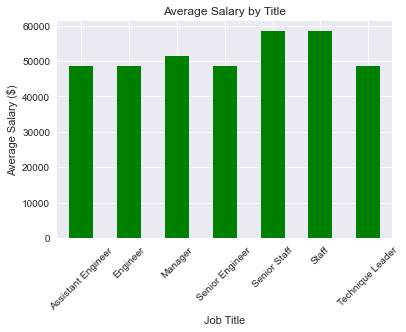

In [121]:
# Create a bar chart of average salary by title.
salary_plot = summary_df.plot(kind="bar",title="Average Salary by Title",rot=45,color='green',legend=False)
salary_plot.set_xlabel("Job Title")
salary_plot.set_ylabel("Average Salary ($)")
salary_plot

In [13]:
# Epilogue, query Employee ID 499942
me = session.query(Employees).filter(Employees.emp_no == 499942)

for record in me:
    (id) = record
    print(f"My ID#: {id.emp_no} My Name: {id.first_name} {id.last_name}")

My ID#: 499942 My Name: April Foolsday


In [15]:
# End session
session.close()